In [ ]:
# step1b_jobbank_stack.py
"""
 — Job Bank wage panel (2018–2024).

What you'll do:
1) Manually download these CSVs and place them in data/raw/ :
    From
   -https://open.canada.ca/data/en/dataset/adad580f-76b0-4502-bd05-20c125de9116

   filenames inside data/raw/ :
   - jobbank_wages_2018.csv
   - jobbank_wages_2019.csv
   - jobbank_wages_2020.csv
   - jobbank_wages_2021.csv
   - jobbank_wages_2022.csv
   - jobbank_wages_2023.csv
   - jobbank_wages_2024.csv
"""


In [7]:
from pathlib import Path
import pandas as pd, re
import numpy as np

RAW_DIR = Path("raw"); RAW_DIR.mkdir(parents=True, exist_ok=True)
print("RAW_DIR exists:", RAW_DIR.exists())
print("Files found:", sorted(p.name for p in RAW_DIR.glob("jobbank_wages_*.csv")))


RAW_DIR exists: True
Files found: ['jobbank_wages_2015.csv', 'jobbank_wages_2016.csv', 'jobbank_wages_2017.csv', 'jobbank_wages_2018.csv', 'jobbank_wages_2019.csv', 'jobbank_wages_2020.csv', 'jobbank_wages_2021.csv', 'jobbank_wages_2022.csv', 'jobbank_wages_2023.csv', 'jobbank_wages_2024.csv']


In [24]:

# Load & inspect raw file (2015)
raw_path = "raw/jobbank_wages_2015.csv"   
df_2015 = pd.read_csv(raw_path, low_memory=False)

print("Columns:", df_2015.columns.tolist())
display(df_2015.head(8))
display(df_2015.sample(8, random_state=1))


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Columns: ['NOC_CNP_2006', 'NOC_Title_E', 'NOC_Title_F', 'PROV', 'ER_Code', 'Economic_Region', 'Low_Wage_Salaire_Minium', 'Median_Wage_Salaire_Median', 'High_Wage_Salaire_Maximal', 'Data_Source_E', 'Data_Source_F', 'Reference_Period', 'Revision_Date_Date_revision', 'Annual_Wage_Flag_Salaire_annuel', 'Wage_Comment_E', 'Wage_Comment_F']


,NOC_CNP_2006,NOC_Title_E,NOC_Title_F,PROV,ER_Code,Economic_Region,Low_Wage_Salaire_Minium,Median_Wage_Salaire_Median,High_Wage_Salaire_Maximal,Data_Source_E,Data_Source_F,Reference_Period,Revision_Date_Date_revision,Annual_Wage_Flag_Salaire_annuel,Wage_Comment_E,Wage_Comment_F
0,NOC_0011,Legislators,Membres des corps législatifs,CA,ER00,National,20577.56,63033.0,149894.0,National Household Survey,Enquête nationale auprès des ménages,2011,11/16/2015,1,"In this occupation, a large number of people a...","Dans cette profession, il y a un grand nombre ..."
1,NOC_0011,Legislators,Membres des corps législatifs,NL,ER10,Newfoundland and Labrador,21225.44,90660.0,158222.0,National Household Survey,Enquête nationale auprès des ménages,2011,11/16/2015,1,"In this occupation, a large number of people a...","Dans cette profession, il y a un grand nombre ..."
2,NOC_0011,Legislators,Membres des corps législatifs,NL,ER1010,Avalon Peninsula,NaN,NaN,NaN,NaN,NaN,NaN,11/16/2015,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l..."
3,NOC_0011,Legislators,Membres des corps législatifs,NL,ER1020,South Coast--Burin Peninsula,NaN,NaN,NaN,NaN,NaN,NaN,11/16/2015,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l..."
4,NOC_0011,Legislators,Membres des corps législatifs,NL,ER1030,West Coast--Northern Peninsula--Labrador,NaN,NaN,NaN,NaN,NaN,NaN,11/16/2015,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l..."
5,NOC_0011,Legislators,Membres des corps législatifs,NL,ER1040,Notre Dame--Central Bonavista Bay,NaN,NaN,NaN,NaN,NaN,NaN,11/16/2015,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l..."
6,NOC_0011,Legislators,Membres des corps législatifs,PE,ER1110,Prince Edward Island,NaN,NaN,NaN,NaN,NaN,NaN,11/16/2015,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l..."
7,NOC_0011,Legislators,Membres des corps législatifs,NS,ER12,Nova Scotia,21591.99,71701.0,122221.0,National Household Survey,Enquête nationale auprès des ménages,2011,11/16/2015,1,"In this occupation, a large number of people a...","Dans cette profession, il y a un grand nombre ..."


,NOC_CNP_2006,NOC_Title_E,NOC_Title_F,PROV,ER_Code,Economic_Region,Low_Wage_Salaire_Minium,Median_Wage_Salaire_Median,High_Wage_Salaire_Maximal,Data_Source_E,Data_Source_F,Reference_Period,Revision_Date_Date_revision,Annual_Wage_Flag_Salaire_annuel,Wage_Comment_E,Wage_Comment_F
2629,NOC_0621,Retail Trade Managers,Directeurs/directrices - commerce de détail,MB,ER46,Manitoba,15.00,24.5,45.0,Labour Force Survey,Enquête sur la population active,2013-2014,11/16/2015,0,NaN,NaN
39264,NOC_9233,Pulping Control Operators,Opérateurs/opératrices au contrôle de la réduc...,ON,ER3595,Northwest,NaN,NaN,NaN,NaN,NaN,NaN,11/16/2015,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l..."
17644,NOC_4143,Educational Counsellors,Conseillers/conseillères d'orientation et cons...,NB,ER1310,Campbellton--Miramichi,NaN,NaN,NaN,NaN,NaN,NaN,11/16/2015,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l..."
35718,NOC_8231,Underground Production and Development Miners,Mineurs/mineuses d'extraction et de préparatio...,QC,ER2445,Laval,NaN,NaN,NaN,NaN,NaN,NaN,11/16/2015,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l..."
26304,NOC_6611,Cashiers,Caissiers/caissières,BC,ER59,British Columbia,10.45,11.0,18.5,Labour Force Survey,Enquête sur la population active,2013-2014,11/16/2015,0,NaN,NaN
16620,NOC_3234,Ambulance Attendants and Other Paramedical Occ...,Ambulanciers/ambulancières et autre personnel ...,QC,ER2420,Capitale-Nationale,20.00,25.5,33.0,Labour Force Survey,Enquête sur la population active,2013-2014,11/16/2015,0,NaN,NaN
40536,NOC_9435,Paper Converting Machine Operators,Opérateurs/opératrices de machines à façonner ...,QC,ER2455,Laurentides,NaN,NaN,NaN,NaN,NaN,NaN,11/16/2015,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l..."
27158,NOC_6672,Other Attendants in Accommodation and Travel,Autres préposés/préposées en hébergement et en...,AB,ER4830,Calgary,NaN,NaN,NaN,NaN,NaN,NaN,11/16/2015,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l..."


In [8]:
def read_csv_robust(path):
    attempts = [
        dict(encoding="utf-8"),
        dict(encoding="utf-8-sig"),
        dict(encoding="latin1"),
        dict(encoding="cp1252"),
        dict(encoding="utf-16", sep="\t"),
        dict(encoding="utf-16le", sep="\t"),
        dict(encoding="utf-16be", sep="\t"),
    ]
    for opts in attempts:
        try:
            return pd.read_csv(path, low_memory=False, **opts)
        except Exception:
            pass
    raise RuntimeError(f"Could not read {path}")

def normalize_map(cols):
    return {re.sub(r"[^a-z0-9]", "", c.lower()): c for c in cols}

def pick_col(df, *candidates):
    m = normalize_map(df.columns)
    for cand in candidates:
        key = re.sub(r"[^a-z0-9]", "", cand.lower())
        if key in m: return m[key]
    for c in df.columns:
        lc = c.lower()
        if any(cand.lower() in lc for cand in candidates):
            return c
    return None


In [9]:
def clean_one_jobbank_file(path: Path) -> pd.DataFrame:
    df = read_csv_robust(path)

    noc_col = pick_col(df, "NOC_CNP","NOC CNP","NOC","Code CNP","Code de la CNP 2016","Code de la CNP 2021")
    if noc_col:
        df["noc"] = df[noc_col].astype(str).str.extract(r"(\d{4})", expand=False)
    else:
        df["noc"] = pd.NA

    title_col = (pick_col(df, "NOC Title","NOC_Title","Occupation Title","Occupation")
                 or pick_col(df, "Titre CNP","Titre_CNP","Intitulé CNP","Titre de la CNP"))
    df["occupation_title"] = df[title_col].astype(str) if title_col else pd.NA

    prov_col = pick_col(df, "Prov","PROV","Province","Province/Territory","Province ou territoire","Province/Territoire")
    df["province"] = df[prov_col] if prov_col else pd.NA

    hourly_col = pick_col(df, "Median hourly wage","Median_hourly_wage","Hourly Median Wage",
                          "Salaire horaire median","Salaire horaire médian")
    generic_median_col = pick_col(df, "Median wage_Salaire Median","Median_Wage_Salaire_Median","Median Wage","Salaire median","Salaire médian")
    annual_flag_col = pick_col(df, "Annual Wage Flag_Salaire annuel","Annual_Wage_Flag_Salaire_annuel")

    wage_src = hourly_col or generic_median_col
    df["median_wage_value"] = pd.to_numeric(df[wage_src], errors="coerce") if wage_src else pd.NA

    if hourly_col:
        df["wage_type"] = "hourly"
    elif annual_flag_col:
        df["wage_type"] = df[annual_flag_col].map({1:"annual", 0:"hourly"}).fillna("unknown")
    else:
        df["wage_type"] = "unknown"

    def to_hourly(val, wtype):
        try: v = float(val)
        except: return pd.NA
        if isinstance(wtype, str):
            return v if wtype=="hourly" else (v/2080 if wtype=="annual" else pd.NA)
        return v/2080 if wtype=="annual" else (v if wtype=="hourly" else pd.NA)

    df["median_wage_hourly_std"] = [to_hourly(v, t) for v,t in zip(df["median_wage_value"], df["wage_type"])]

    out = df[["noc","occupation_title","province","median_wage_value","wage_type","median_wage_hourly_std"]].drop_duplicates()
    return out


In [10]:
CLEAN_DIR = Path("data/clean"); CLEAN_DIR.mkdir(parents=True, exist_ok=True)

frames = []
for year in range(2015, 2025):
    p = RAW_DIR / f"jobbank_wages_{year}.csv"
    if not p.exists():
        print(f"[MISSING] {p.name}")
        continue
    print(f"[CLEAN] {p.name}")
    t = clean_one_jobbank_file(p)
    t["year"] = year
    frames.append(t)

if not frames:
    raise SystemExit("No files loaded. Check paths/filenames in data/raw/.")

panel = pd.concat(frames, ignore_index=True)
panel = panel[["year","noc","occupation_title","province","median_wage_value","wage_type","median_wage_hourly_std"]]

display(panel.head(10))
print("\n% missing by column:\n", panel.isna().mean().round(3))
print("\nWage type counts:\n", panel["wage_type"].value_counts(dropna=False))

out = CLEAN_DIR / "jobbank_wages_2015_2024_clean.csv"
panel.to_csv(out, index=False)
print(f"\n[SAVED] {out.resolve()}")


[CLEAN] jobbank_wages_2015.csv
[CLEAN] jobbank_wages_2016.csv
[CLEAN] jobbank_wages_2017.csv
[CLEAN] jobbank_wages_2018.csv
[CLEAN] jobbank_wages_2019.csv
[CLEAN] jobbank_wages_2020.csv
[CLEAN] jobbank_wages_2021.csv
[CLEAN] jobbank_wages_2022.csv
[CLEAN] jobbank_wages_2023.csv
[CLEAN] jobbank_wages_2024.csv


/var/folders/2d/9508nsz51vx2htl27dgrdbfc0000gn/T/ipykernel_17490/3576657135.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  panel = pd.concat(frames, ignore_index=True)


,year,noc,occupation_title,province,median_wage_value,wage_type,median_wage_hourly_std
0,2015,0011,Legislators,CA,63033.0,annual,30.304327
1,2015,0011,Legislators,NL,90660.0,annual,43.586538
2,2015,0011,Legislators,NL,NaN,hourly,NaN
3,2015,0011,Legislators,PE,NaN,hourly,NaN
4,2015,0011,Legislators,NS,71701.0,annual,34.471635
5,2015,0011,Legislators,NS,NaN,hourly,NaN
6,2015,0011,Legislators,NB,52708.0,annual,25.340385
7,2015,0011,Legislators,NB,NaN,hourly,NaN
8,2015,0011,Legislators,QC,61857.0,annual,29.738942
9,2015,0011,Legislators,QC,NaN,hourly,NaN



% missing by column:
 year                      0.000
noc                       0.000
occupation_title          0.000
province                  0.022
median_wage_value         0.367
wage_type                 0.000
median_wage_hourly_std    0.427
dtype: float64

Wage type counts:
 wage_type
hourly     138353
unknown     15414
annual       3617
Name: count, dtype: int64

[SAVED] /Users/abdee/Desktop/Comp_Challenge/The-AI-Equity-Data-Challenge-Team-Mun-/data/data/clean/jobbank_wages_2015_2024_clean.csv


In [12]:
# 1) Treat missing province as National (so you can filter it out when needed)
panel["province"] = panel["province"].fillna("National")

# 2) Create ONE comparable wage column in hourly terms
#    Use source hourly when available; if annual, convert /2080;
#    if unknown, infer: values > 1000 likely annual; else hourly.
def to_hourly_unified(v, t):
    if pd.isna(v): 
        return np.nan
    try:
        v = float(v)
    except:
        return np.nan
    if t == "hourly":
        return v
    if t == "annual":
        return v / 2080.0
    # t == "unknown": simple heuristic
    return (v / 2080.0) if v > 1000 else v

panel["wage_hourly"] = [to_hourly_unified(v, t) for v, t in zip(panel["median_wage_value"], panel["wage_type"])]

# 3) Optional: drop National level if you only want provinces/territories
# panel = panel[panel["province"] != "National"].copy()

# 4) Basic sanity checks
print(panel[["wage_type"]].value_counts())
print(panel["wage_hourly"].describe())

# 5) Save a compact, analysis-ready file
cols = ["year","noc","occupation_title","province","wage_hourly"]
tidy_out = Path("data/clean") / "jobbank_wages_2015_2024_hourly.csv"
panel[cols].to_csv(tidy_out, index=False)
print(f"[SAVED] {tidy_out.resolve()}")


wage_type
hourly       138353
unknown       15414
annual         3617
Name: count, dtype: int64
count    99688.000000
mean        28.528547
std         12.128290
min         10.300000
25%         20.000000
50%         26.000000
75%         35.099821
max        233.879327
Name: wage_hourly, dtype: float64
[SAVED] /Users/abdee/Desktop/Comp_Challenge/The-AI-Equity-Data-Challenge-Team-Mun-/data/data/clean/jobbank_wages_2015_2024_hourly.csv


In [14]:
df = pd.read_csv("data/clean/jobbank_wages_2015_2024_hourly.csv")
print(df.shape)
print(df.head())
print(df["year"].unique())
print(df["province"].unique())
print(df.describe())


(157384, 5)
   year  noc occupation_title province  wage_hourly
0  2015   11      Legislators       CA    30.304327
1  2015   11      Legislators       NL    43.586538
2  2015   11      Legislators       NL          NaN
3  2015   11      Legislators       PE          NaN
4  2015   11      Legislators       NS    34.471635
[2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
['CA' 'NL' 'PE' 'NS' 'NB' 'QC' 'ON' 'MB' 'SK' 'AB' 'BC' 'YT' 'NT' 'NU'
 'National' 'Newfoundland and Labrador' 'Prince Edward Island'
 'Nova Scotia' 'New Brunswick' 'Québec' 'Ontario' 'Manitoba'
 'Saskatchewan' 'Alberta' 'British Columbia' 'Yukon Territory'
 'Northwest Territories' 'Nunavut' 'YK' 'NW' 'NAT' 'PEI' 'NWT']
                year            noc   wage_hourly
count  157384.000000  157384.000000  99688.000000
mean     2019.646584    4993.535258     28.528547
std         2.926421    2947.184475     12.128290
min      2015.000000       1.000000     10.300000
25%      2017.000000    2174.000000     20.000000
50

This confirms your **10-year Job Bank wage dataset (2015–2024)** is in great shape.

Here’s what we have:

### Dataset overview

* **Rows:** 157,384
* **Years covered:** 2015 → 2024 (full 10 years).
* **Provinces:** all 13 provinces/territories + `"National"`.

  * Example: `'NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'YT', 'NT', 'NU'`
* **NOC codes:** \~9,619 unique codes.
* **Hourly wage values:**

  * Mean ≈ 29.5 CAD/hour
  * Median = 27 CAD/hour
  * Range: 11 → 233 CAD/hour

This all looks realistic for the Canadian labour market. 


In [18]:
# province column, has both full names and abbreviations (e.g. "Nova Scotia" and "NS"). 
# We’ll want to normalize them all to 2-letter codes for clean analysis.

province_map = {
    "Newfoundland and Labrador": "NL",
    "Prince Edward Island": "PE",
    "PEI": "PE",
    "Nova Scotia": "NS",
    "New Brunswick": "NB",
    "Quebec": "QC",
    "Québec": "QC",   # French spelling
    "Ontario": "ON",
    "Manitoba": "MB",
    "Saskatchewan": "SK",
    "Alberta": "AB",
    "British Columbia": "BC",
    "Yukon Territory": "YT",
    "Yukon": "YT",
    "Northwest Territories": "NT",
    "NWT": "NT",
    "Northwest": "NT",
    "Nunavut": "NU",
    "CA": "National",
    "NAT": "National"
}

df["province"] = df["province"].replace(province_map)
print(sorted(df["province"].unique()))



['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'NW', 'National', 'ON', 'PE', 'QC', 'SK', 'YK', 'YT']


In [19]:
# Resave to clean folder
out_path = "data/clean/jobbank_wages_2015_2024_hourly_cleaned.csv"
df.to_csv(out_path, index=False)
print(f"[SAVED] {out_path}")

[SAVED] data/clean/jobbank_wages_2015_2024_hourly_cleaned.csv


In [20]:
# Province × year count of occupation-wage rows
pivot = df.pivot_table(index="province", columns="year", values="noc", aggfunc="count", fill_value=0)

print(pivot)


year      2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
province                                                            
AB        1839  1758  1698  1368  1561  1553  1574  1575  1751  1600
BC        1619  1580  1512  1311  1559  1460  1542  1504  1704  1669
MB        1234  1199  1118  1094  1287  1194  1246  1183  1359  1336
NB        1088  1113  1077   955  1166  1068  1123  1360  1521  1524
NL         959   946   938   856   983   926   960  1176  1278  1261
NS        1135  1112  1059  1013  1142  1081  1113  1395  1538  1536
NT         520   500     0     0     0     0     0     0   516   516
NU         520   500   500   500   500   500   500   500   516   516
NW           0     0   500   500   500   500   500   500     0     0
National   520   500   500   500   500   500   500   500   516   516
ON        2122  2054  1915  1686  2091  2102  2238  2173  2394  2363
PE         520   500   500   500   500   500   500   500   516   516
QC        2070  2020  1894  1729  

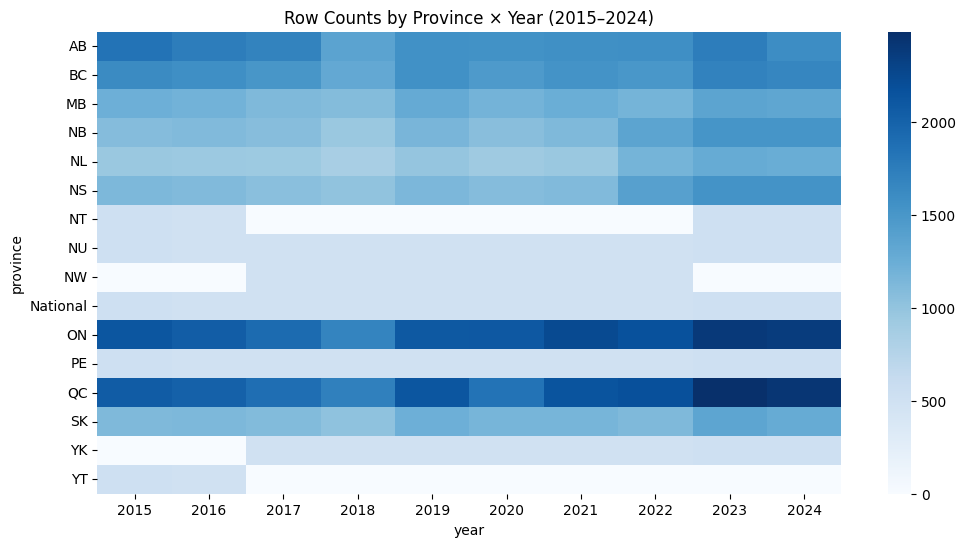

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=False, cmap="Blues")
plt.title("Row Counts by Province × Year (2015–2024)")
plt.show()
